In [8]:
#### NEW PILOT DATA WITH BALANCED TRIAL SPREADSHEET ####


In [84]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [85]:
#import excel file containing data summary

wtpdata = pd.read_csv(r'new_pilot_wtp.csv', encoding='utf-8-sig')
#wtpdata = pd.read_excel(r'wtp_taskdata_NEW.xlsx')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)

    Unnamed: 0               participant  avg_spent_social  \
0            0  5914b7b50a4b9d0001add64f          0.020000   
1            1  5beaed3f0af61d0001968d9a          0.033846   
2            2  5c523d16102de10001022098          0.028919   
3            3  5dc368ce880a2927e264dbec          0.029474   
4            4  5e70d4869ffb1404cb1f5070          0.023846   
5            5  5efc9ea8f8e7950584b12e87          0.032000   
6            6  5f2f566ddaea2a3417b75920          0.020455   
7            7  5f3964ca4539e00bd5ce47fb          0.028261   
8            8  5f793609f8089e53266336f5          0.030000   
9            9  5f8c70c9c8e71c0b49e49797          0.028000   
10          10  5f94977cf830e82e361b9de1          0.030000   
11          11  60fc6bdffe3e6e8caf924670          0.021429   
12          12  60fd7f782b0c5f0b6503302a          0.030244   
13          13  60fd9a010279e0f7e338571a          0.030800   
14          14  60fdae513bfebe2fe0122138          0.030000   
15      

In [86]:
socialavg= wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.028409197653
standard error of the mean: 0.000666505017


In [87]:
nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences


nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))

group mean: 0.028566009041
standard error of the mean: 0.000546730091


In [88]:
#sample size
n = len(wtpdata)
print(n)

49


In [89]:

#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.0004443290313736341 -0.007683758000000013
0.0030383799501080056


In [90]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.00043405427858685797


In [91]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

-0.36127137892898986


In [92]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

48


In [93]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=-0.361, df=48, cv=1.677, p=0.719
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


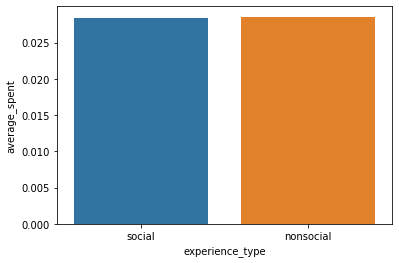

In [94]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)

In [95]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

-0.03675009272258111


In [96]:
prop_social = wtpdata['prop_social']
aq = wtpdata.AQ #autism quotient
mspss = wtpdata.MSPSS #perceived social support

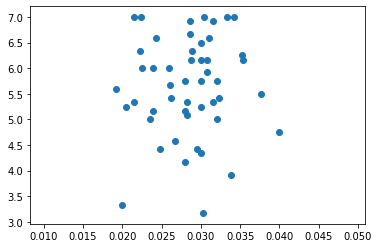

[[2.17672180e-05 2.37985217e-04]
 [2.37985217e-04 9.27083333e-01]]
Pearsons correlation: 0.053
p value: 0.7177
Accept null hypothesis that the means are equal.


In [97]:
#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

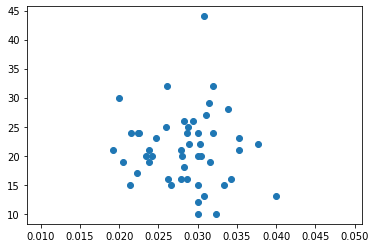

[[ 2.17672180e-05 -1.95161864e-03]
 [-1.95161864e-03  3.92363946e+01]]
Pearsons correlation: -0.067
p value: 0.6485
Accept null hypothesis that the means are equal.


In [98]:
#amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [99]:
##### prop of chosen social // self report #####

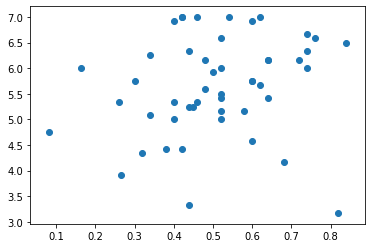

[[0.02665945 0.0302306 ]
 [0.0302306  0.92708333]]
Pearsons correlation: 0.192
p value: 0.1856
Accept null hypothesis that the means are equal.


In [100]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

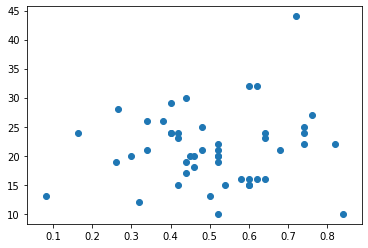

[[2.66594541e-02 9.31578855e-02]
 [9.31578855e-02 3.92363946e+01]]
Pearsons correlation: 0.091
p value: 0.5337
Accept null hypothesis that the means are equal.


In [101]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [102]:
##### avg spent on nonsocial // self report #####

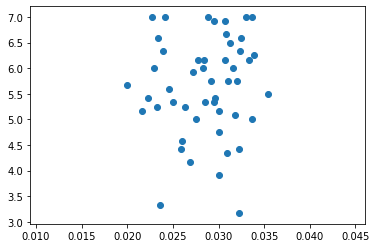

[[1.46467758e-05 2.87718881e-04]
 [2.87718881e-04 9.27083333e-01]]
Pearsons correlation: 0.078
p value: 0.5939
Accept null hypothesis that the means are equal.


In [103]:
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

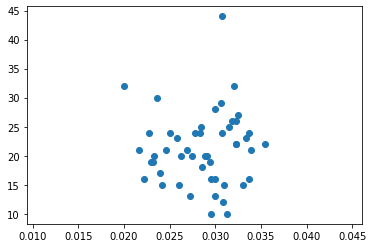

[[1.46467758e-05 6.85078222e-04]
 [6.85078222e-04 3.92363946e+01]]
Pearsons correlation: 0.029
p value: 0.8455
Accept null hypothesis that the means are equal.


In [104]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [105]:
prop_socialavg= wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


prop_nonsocialavg= wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.508146605571
mean: 0.491853394429


In [106]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

5.1316231583290275 0.7983673459999995
0.3265544617221569


In [107]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.046650637388879555


In [108]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)

0.3492602042505215


In [109]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05


# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')



48
t=0.349, df=48, cv=1.677, p=0.728
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


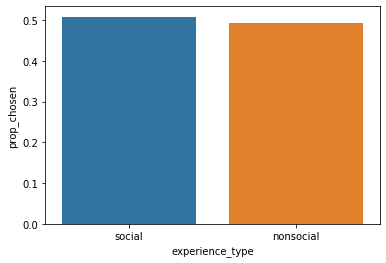

In [110]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.prop_chosen, data=wtp_means)


In [161]:
## total --  spent more on social vs non-social

print(sum(wtpdata.moresocial))

24


In [162]:
allmoresocials= pd.read_csv('allmoresocials.csv')
print(allmoresocials)

                 participant  avg_spent_social  avg_spent_nonsocial  \
0   5beaed3f0af61d0001968d9a          0.033846             0.030000   
1   5e70d4869ffb1404cb1f5070          0.023846             0.022917   
2   60fd9a010279e0f7e338571a          0.030800             0.027200   
3   60fdae513bfebe2fe0122138          0.030000             0.026296   
4   60fe2fb42ec6d443757a92fc          0.033333             0.033043   
5   60ff2035293107014b9770e8          0.031538             0.029459   
6   610040d9d3e1fbd63a3f41e5          0.028750             0.028462   
7   6100b292b7fc7f30ec9132dc          0.030000             0.027778   
8   6103fa5faa24894dcd2cda34          0.040000             0.030000   
9   610421096c1af729ade5aac1          0.026250             0.022222   
10  610808ab1708833b02eb8a57          0.035294             0.033939   
11  61088cda72a1106216fa4858          0.024231             0.023333   
12  610934fd924a7b98497b2108          0.035312             0.033333   
13  61

In [163]:
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))


nonsocialavg = allmoresocials.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences
nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))

group mean: 0.030641138391
standard error of the mean: 0.000906614002
group mean: 0.028325183391
standard error of the mean: 0.000884797671


In [164]:
#sample size
n = len(allmoresocials)
print(n)


23


In [165]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.00023439766188343108 0.05326696499999999
0.0022465505675555953


In [166]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)



0.03647960656824886


In [167]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

22


In [168]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=0.036, df=22, cv=1.717, p=0.971
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


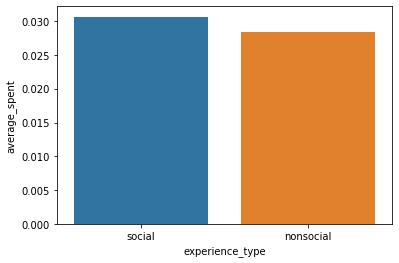

In [169]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)


In [170]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)


0.5390990810677809


In [171]:
prop_social = allmoresocials['prop_social']
aq = allmoresocials.AQ #autism quotient
mspss = allmoresocials.MSPSS #perceived social support


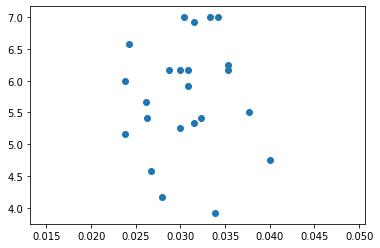

[[1.89048258e-05 8.82893478e-05]
 [8.82893478e-05 7.75444664e-01]]
Pearsons correlation: 0.023
p value: 0.9168
Accept null hypothesis that the means are equal.


In [172]:
#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

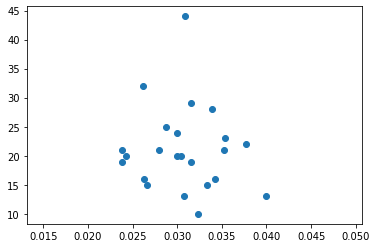

[[ 1.89048258e-05 -3.29700701e-03]
 [-3.29700701e-03  5.33913043e+01]]
Pearsons correlation: -0.104
p value: 0.6375
Accept null hypothesis that the means are equal.


In [173]:
#amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


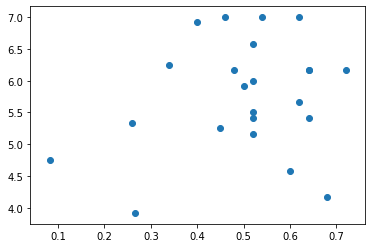

[[0.02317543 0.03032239]
 [0.03032239 0.77544466]]
Pearsons correlation: 0.226
p value: 0.2994
Accept null hypothesis that the means are equal.


In [174]:
##### prop of chosen social // self report #####
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


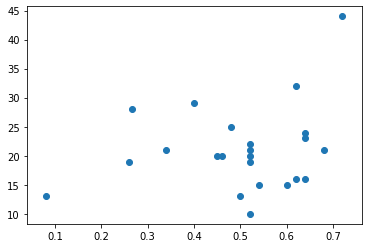

[[2.31754292e-02 2.75928047e-01]
 [2.75928047e-01 5.33913043e+01]]
Pearsons correlation: 0.248
p value: 0.2538
Accept null hypothesis that the means are equal.


In [175]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


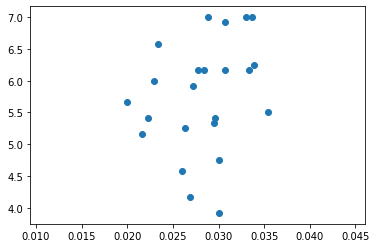

[[1.80059391e-05 9.67128283e-04]
 [9.67128283e-04 7.75444664e-01]]
Pearsons correlation: 0.259
p value: 0.2331
Accept null hypothesis that the means are equal.


In [176]:
##### avg spent on nonsocial // self report #####
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


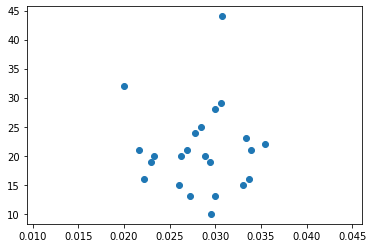

[[ 1.80059391e-05 -1.83240144e-04]
 [-1.83240144e-04  5.33913043e+01]]
Pearsons correlation: -0.006
p value: 0.9786
Accept null hypothesis that the means are equal.


In [177]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [178]:
prop_socialavg= allmoresocials.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


mean: 0.501561668130


In [179]:
prop_nonsocialavg= allmoresocials.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.498438331870


In [180]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

2.0396621417559353 0.0718367340000004


In [181]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)


0.3044695664355374


In [182]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)


0.06348629324351769


In [183]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)


0.04919701720321324


In [184]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

22


In [185]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=0.049, df=22, cv=1.717, p=0.961
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


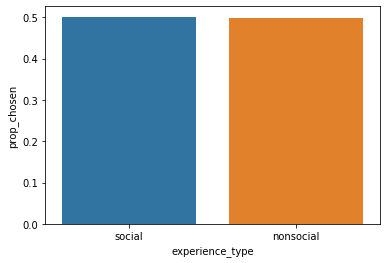

In [186]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.prop_chosen, data=wtp_means)


In [ ]:
## total -- prop of social > prop of non-social

In [190]:
#import excel file containing data summary


prop_allmoresocials = pd.read_csv(r'prop_allmoresocials.csv', encoding='utf-8-sig')
#prop_allmoresocials = pd.read_excel(r'wtp_taskdata_NEW.xlsx')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(prop_allmoresocials)

                 participant  avg_spent_social  avg_spent_nonsocial  \
0   5c523d16102de10001022098          0.028919             0.032308   
1   5e70d4869ffb1404cb1f5070          0.023846             0.022917   
2   5efc9ea8f8e7950584b12e87          0.032000             0.032000   
3   5f793609f8089e53266336f5          0.030000             0.031250   
4   60fd7f782b0c5f0b6503302a          0.030244             0.032222   
5   60fe2fb42ec6d443757a92fc          0.033333             0.033043   
6   60fed38a8adb46e44e0869a5          0.023462             0.027500   
7   61009741973fdb40344de5e7          0.025946             0.031538   
8   6100b292b7fc7f30ec9132dc          0.030000             0.027778   
9   61023e0830e893bec6bd8f3c          0.028667             0.029500   
10  610421096c1af729ade5aac1          0.026250             0.022222   
11  61083f623522116ea15fdc05          0.030000             0.031000   
12  61088cda72a1106216fa4858          0.024231             0.023333   
13  61

In [191]:
socialavg= prop_allmoresocials.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))


nonsocialavg = prop_allmoresocials.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences
nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))

group mean: 0.029178078120
standard error of the mean: 0.000743920112
group mean: 0.029086183280
standard error of the mean: 0.000847437181


In [192]:
#sample size
n = len(prop_allmoresocials)
print(n)


25


In [193]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)


0.00016071461425616701 0.002297370999999982
0.00258604828612194


In [194]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.000517209657224388


In [195]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

0.17767425398271472


In [196]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05


24


In [197]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=0.178, df=24, cv=1.711, p=0.860
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


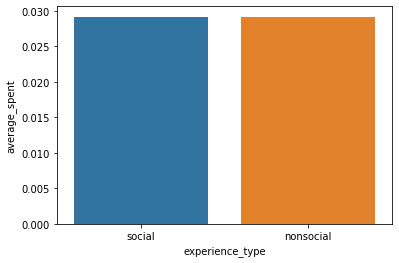

In [198]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)


In [199]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)


0.02304976547577062


In [200]:
prop_social = prop_allmoresocials['prop_social']
aq = prop_allmoresocials.AQ #autism quotient
mspss = prop_allmoresocials.MSPSS #perceived social support


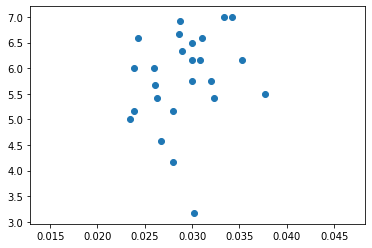

[[1.38354283e-05 7.52156453e-04]
 [7.52156453e-04 8.45555555e-01]]
Pearsons correlation: 0.220
p value: 0.2909
Accept null hypothesis that the means are equal.


In [201]:
#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


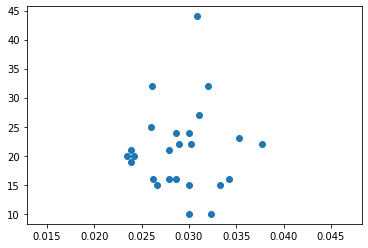

[[1.38354283e-05 7.40834782e-04]
 [7.40834782e-04 5.43266667e+01]]
Pearsons correlation: 0.027
p value: 0.8980
Accept null hypothesis that the means are equal.


In [202]:
#amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [203]:
##### prop of chosen social // self report #####


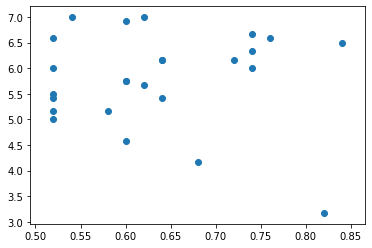

[[ 0.009624   -0.00318333]
 [-0.00318333  0.84555556]]
Pearsons correlation: -0.035
p value: 0.8670
Accept null hypothesis that the means are equal.


In [204]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


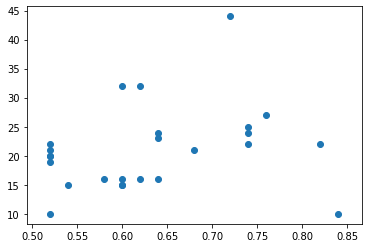

[[9.62400000e-03 1.68866667e-01]
 [1.68866667e-01 5.43266667e+01]]
Pearsons correlation: 0.234
p value: 0.2612
Accept null hypothesis that the means are equal.


In [205]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


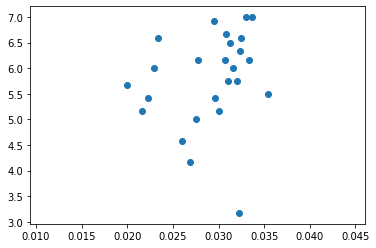

[[1.79537444e-05 8.55323845e-04]
 [8.55323845e-04 8.45555555e-01]]
Pearsons correlation: 0.220
p value: 0.2917
Accept null hypothesis that the means are equal.


In [206]:
##### avg spent on nonsocial // self report #####
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


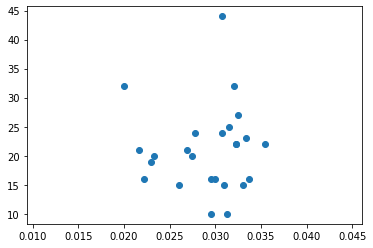

[[1.79537444e-05 2.24154350e-05]
 [2.24154350e-05 5.43266667e+01]]
Pearsons correlation: 0.001
p value: 0.9973
Accept null hypothesis that the means are equal.


In [207]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


In [208]:
prop_socialavg= prop_allmoresocials.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


mean: 0.633600000000


In [224]:
prop_nonsocialavg= prop_allmoresocials.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))


mean: 0.366400000000


In [218]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.00016071461425616701 0.002297370999999982
0.00258604828612194


In [219]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)


0.000517209657224388


In [220]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)


261.3285855020217


In [221]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05


24


In [222]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=261.329, df=24, cv=1.711, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


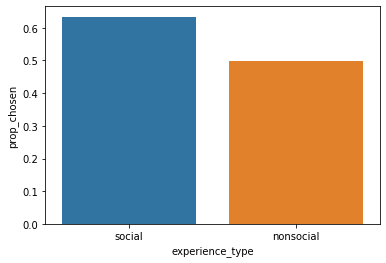

In [223]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.prop_chosen, data=wtp_means)


In [1]:
wtp_means

NameError: name 'wtp_means' is not defined